In [3]:
from __future__ import division
import math
from deModel import DeFixedInt
from deModel import arrayFixedInt
import scipy.signal as sig
from scipy.fftpack import fft, ifft, fftshift
import numpy as np
import matplotlib.pyplot as plt

F = 133
Fs = 1000
S = 200 

t = np.arange(0, S/Fs, 1/Fs)

x = np.sin(2*np.pi*F*t)/256

spec_sig = fftshift(abs(fft(x)))/S
plt.plot(spec_sig)
print (np.amax(spec_sig))

0.00146600492845


0.0015971663261


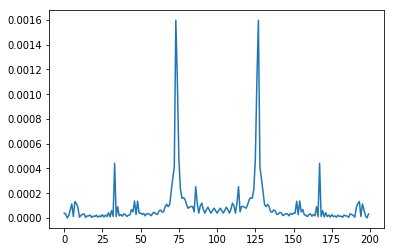

In [4]:
def quant_signal(Nq,Mq,sig):
    sig_fx = arrayFixedInt(Nq,Mq, sig)
    sig_fxv = np.zeros(len(sig))
    for i in range(len(sig_fx)):
        sig_fxv[i] = (sig_fx[i].value / (2.0 ** sig_fx[i].fractWidth))
    return sig_fxv
N=1
M=8
q_sig = quant_signal(N,M,x)
spec_sig = fftshift(abs(fft(q_sig))/S)
plt.plot(spec_sig)
#plt.plot(q_sig[0:10])
print (np.amax(spec_sig))

0.00152018041121


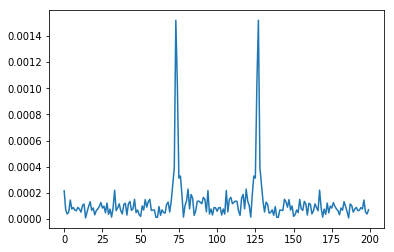

In [5]:
noise = np.random.normal(0,1/1024,len(x))
q_noise = quant_signal(N,M,noise)
q_sig_noise = quant_signal(N,M,x+noise) - q_noise
spec_q_sig_noise= fftshift(abs(fft(q_sig_noise))/S)

plt.plot(spec_q_sig_noise)
print (np.amax(spec_q_sig_noise))